[1] "4DPA"  "12DPA" "20DPA"

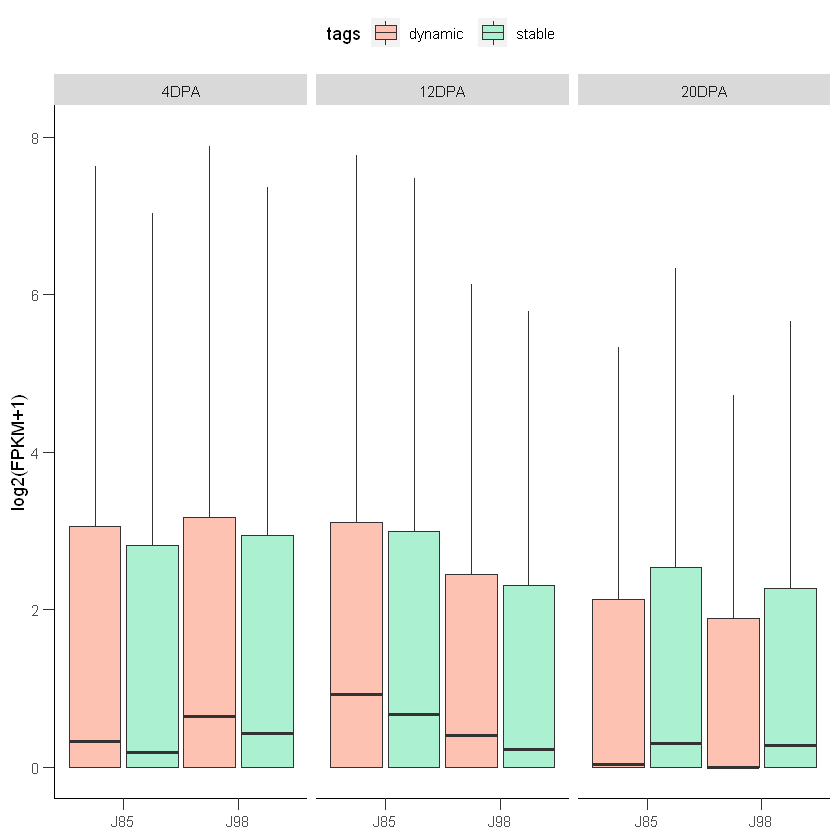

In [7]:
##比较J85和J98网络中保守的和动态的基因表达量
rm(list = ls())
setwd('F:/Multip_species_3Dgenome/Hi-C/loop/net/conserved')
library(ggplot2)
library(ggpubr)
df <- read.csv('J85_J98.txt', sep = '\t', header = T)
df <- within(df, days <- factor(days, levels = c("4DPA", "12DPA", "20DPA")))
with(df, levels(days))
fg <- ggplot(df, aes(x=species, y=log2(FPKM+1), fill=tags))+
geom_boxplot(outlier.colour = NA, notch=FALSE, width=2)+
labs(x=NULL, y='log2(FPKM+1)')+
facet_grid(.~days)+
coord_cartesian(ylim = c(0, 8)) +
theme(panel.background = element_blank(), 
     panel.grid = element_blank(),
     axis.line=element_line(linetype=1,color="black"),
     legend.position='top',
     axis.ticks.length = unit(0.25, 'cm')
     )+
scale_fill_manual(values=c('#FDC2B1', "#AAF0D1"))
fg
ggsave(plot =fg, filename = 'J85_J98.pdf', height =3.5, width = 3)

[1] "4DPA"  "12DPA" "20DPA"

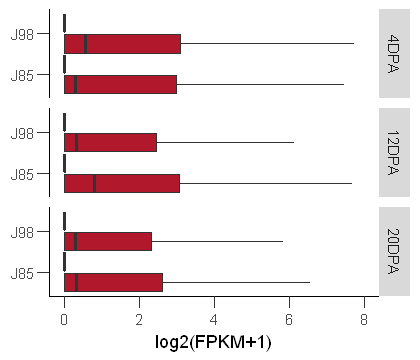

In [8]:
## 分析A/B compartment所包含基因的表达水平上的差异
options(repr.plot.width=3.5,repr.plot.height=3)
rm(list=ls())
setwd('F:/Multip_species_3Dgenome/Hi-C/TAD/cpt')
library(ggplot2)
library(ggpubr)
loop_data <- read.csv('J85_J98_ABcpt_gene.txt', sep = '\t', header = T)
loop_data <- within(loop_data, days <- factor(days, levels = c("4DPA", "12DPA", "20DPA")))
with(loop_data, levels(days))
compaired <- list(c('J98','J85'))
loop <- ggplot(loop_data, aes(x=species, y=log2(fpkm+1),fill=tags)) +  
  #geom_point(alpha=0.85, size = 4, aes(color=days, shape = days))+
  #geom_violin()+
  geom_boxplot(outlier.colour = NA, notch=FALSE, width=2)+
  labs(x=NULL, y='log2(FPKM+1)') +   #不要标签
  facet_grid(days~.)+
  #coord_cartesian(ylim = c(0,8))+
  theme(
    panel.background = element_blank(), #去掉背景色
    panel.grid.major = element_blank(), #去掉网格
    panel.grid.minor = element_blank(),
    axis.line=element_line(linetype=1,color="black"),  #添加轴线   
    legend.position='none', #调整图例,
    #axis.text.x = element_text(angle = 315, hjust = 0),
    axis.ticks.length = unit(0.25, 'cm')
  )+
  #geom_signif(comparisons = compaired, step_increase = 0.05,test =t.test, tip_length=0.01,  y_position=c(6), textsize = 2)+
  scale_fill_manual(values=c( '#B2182B', "#2166AC"))+
  coord_flip(ylim = c(0,8))
loop
ggsave(plot =loop, filename = 'J85_J98_ABcpt_gene.pdf', height =3, width = 3.5,  dpi = 300)


[1] "0DPA"  "5DPA"  "10DPA" "20DPA"

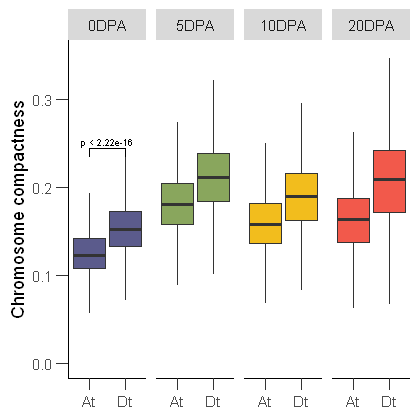

In [28]:
## 分析rich region 和poor region的compartness 
options(repr.plot.width=3.5,repr.plot.height=3.5)
rm(list = ls())
setwd('F:/fiber/compact/iced')
library(ggplot2)
library(ggpubr)
df <- read.csv('DPA_100k_cps_poor.txt', sep = '\t', header = T)
#df <- read.csv('DPA_100k_cps_rich.txt', sep = '\t', header = T)
#head(df)
df <- within(df, days <- factor(days, levels = c("0DPA", "5DPA", "10DPA", "20DPA")))
with(df, levels(days))
tg <- list(c('At', 'Dt'))
fg <- ggplot(df, aes(x=subg, y=reads, fill=days))+
geom_boxplot(outlier.colour = NA, notch=FALSE, width=2)+
labs(x=NULL, y='Chromosome compactness')+
facet_grid(.~days)+
coord_cartesian(ylim = c(0, 0.35)) +
theme(panel.background = element_blank(), 
     panel.grid = element_blank(),
     axis.line=element_line(linetype=1,color="black"),
     legend.position='none',
     axis.ticks.length = unit(0.25, 'cm')
     )+
geom_signif(comparisons = tg, step_increase = 0.1,test =wilcox.test, tip_length=0.01, y_position=c(0.2), textsize = 2)+
scale_fill_manual(values=c('#5b5b8c', "#89a65d","#f2bd1d", "#f2594b" ))
fg
ggsave(plot =fg, filename = '100k_subg_poor.pdf', height =3.5, width = 3,  dpi = 300)
#ggsave(plot =fg, filename = '100k_subg_rich.pdf', height =3.5, width = 3,  dpi = 300)

In [ ]:
## 分析13个组织的基因表达量上的差异
options(repr.plot.width=3.5,repr.plot.height=3.5)
rm(list = ls())
setwd('F:/J668_multip_tissue_3D-genome/RNA_seq/PCA')
library(ggplot2)
library(ggpubr)
library(tidyr)
library(reshape2)
df <- read.csv('J668_all_tissue_TPM.txt', sep = '\t', header = T)
# df <- within(df, days <- factor(days, levels = c("0DPA", "5DPA", "10DPA", "20DPA")))
# with(df, levels(days))
df_long <- melt(df, id.vars = c('GeneId'), measure.vars = c("anthers1", "anthers2"), variable.name = 'species', values.name='TPM')
df_long
# fg <- ggplot(df, aes(x=subg, y=reads, fill=days))+
# geom_boxplot(outlier.colour = NA, notch=FALSE, width=2)+
# labs(x=NULL, y='Chromosome compactness')+
# facet_grid(.~days)+
# coord_cartesian(ylim = c(0, 0.35)) +
# theme(panel.background = element_blank(), 
#      panel.grid = element_blank(),
#      axis.line=element_line(linetype=1,color="black"),
#      legend.position='none',
#      axis.ticks.length = unit(0.25, 'cm')
#      )+
# geom_signif(comparisons = tg, step_increase = 0.1,test =wilcox.test, tip_length=0.01, y_position=c(0.2), textsize = 2)+
# scale_fill_manual(values=c('#5b5b8c', "#89a65d","#f2bd1d", "#f2594b" ))
# fg
# ggsave(plot =fg, filename = '100k_subg_poor.pdf', height =3.5, width = 3,  dpi = 300)